In [1]:
import pandas as pd


In [7]:
excelfile = pd.ExcelFile("myxls.xlsx")



In [3]:
excelfile

NameError: name 'excelfile' is not defined

In [10]:
dframe = excelfile.parse("myxls")

In [11]:
dframe


,sn,name,marks
0,1,a,50
1,2,b,49
2,3,c,48


In [12]:
from numpy.random import randn


In [13]:
dframe1= randn(10)
dframe1

array([ 0.2910054 , -1.50979842, -0.19314663,  1.86448317,  0.94149546,
        0.78642218,  0.25813991,  0.30298285,  0.22019978,  1.3551969 ])

In [14]:
import seaborn as sbn


In [15]:
dataset = randn(100)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


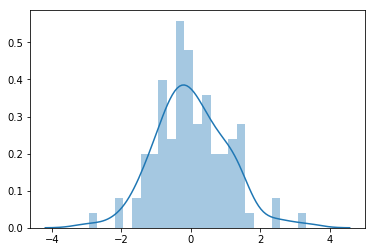

In [17]:
sbn.distplot(dataset, bins=25)

In [19]:
df_titanic = pd.read_csv("train.csv")

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sbn
%matplotlib inline

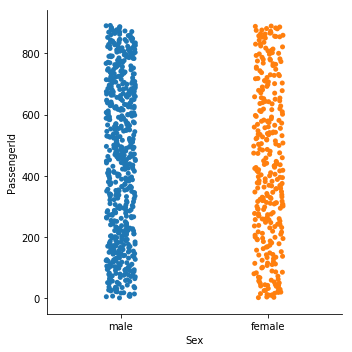

In [34]:
sbn.catplot("Sex","PassengerId",data=df_titanic)

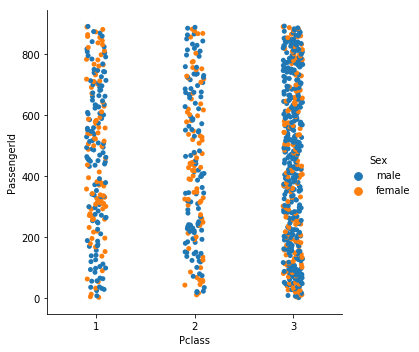

In [37]:
sbn.catplot("Pclass", "PassengerId", hue='Sex',data=df_titanic)

In [45]:
def add_person(Person):
    age,sex = Person
    
    if age<16:
        return 'child'
    else:
        return sex


df_titanic["Person"] = df_titanic[['Age','Sex']].apply(add_person,axis=1) 

In [46]:
df_titanic[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


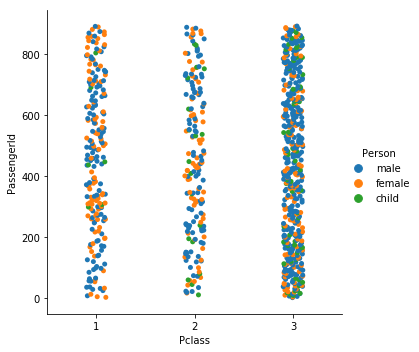

In [51]:
sbn.catplot("Pclass","PassengerId", hue = 'Person', data=df_titanic)

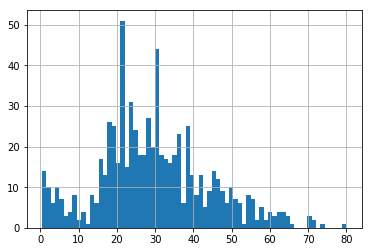

In [54]:
df_titanic['Age'].hist(bins=70)

In [55]:
df_titanic['Age'].mean()

29.69911764705882

In [59]:
df_titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

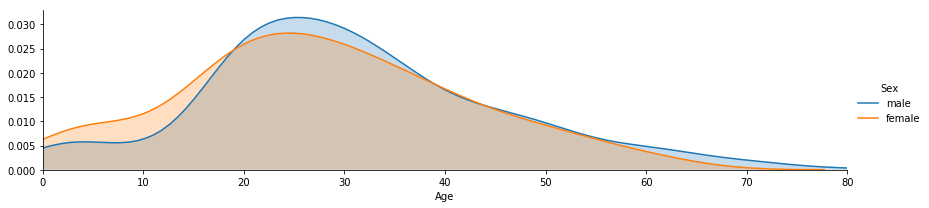

In [65]:
figure = sbn.FacetGrid(df_titanic, hue='Sex', aspect=4)
figure.map(sbn.kdeplot, "Age",shade=True)
oldest=df_titanic['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()
